In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [8]:
cuacaT=cuaca.transpose()
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1728102199,26.77,74.31,1011.32,31.91,1.728102e+09,4.12
1728102259,26.91,74.81,1011.22,31.94,1.728102e+09,4.12
1728102319,26.79,73.95,1011.28,32.02,1.728102e+09,4.12
1728102379,26.67,73.15,1011.16,32.09,1.728102e+09,4.12
1728102439,26.75,73.24,1011.11,32.15,1.728102e+09,4.12
1728102499,27.10,74.36,1011.19,32.24,1.728102e+09,4.12
1728102559,26.95,73.50,1011.17,32.29,1.728103e+09,4.12
1728102621,26.87,72.95,1011.11,32.34,1.728103e+09,4.12
1728102679,27.06,73.30,1011.14,32.46,1.728103e+09,4.11
1728102739,26.49,71.22,1011.12,32.37,1.728103e+09,4.11


In [13]:
cuacaT.describe()

,dew,humidity,pressure,temperature,volt
count,416915.000000,416916.000000,416916.000000,416916.000000,416916.000000
mean,25.014088,85.675668,1011.435902,27.823203,4.091035
std,1.508389,11.141546,2.789317,3.275998,0.030952
min,17.670000,0.000000,0.000000,0.020000,0.000000
25%,24.150000,76.900000,1010.200000,25.410000,4.070000
50%,25.090000,90.080000,1011.480000,26.930000,4.090000
75%,26.050000,94.740000,1012.770000,30.290000,4.120000
max,29.700000,99.580000,1016.530000,41.120000,4.170000


In [14]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

ValueError: invalid literal for int() with base 10: '1970-01-01 00:00:00'

In [11]:
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1728102199,26.77,74.31,1011.32,31.91,2024-10-05 04:23:19,4.12
1728102259,26.91,74.81,1011.22,31.94,2024-10-05 04:24:19,4.12
1728102319,26.79,73.95,1011.28,32.02,2024-10-05 04:25:19,4.12
1728102379,26.67,73.15,1011.16,32.09,2024-10-05 04:26:19,4.12
1728102439,26.75,73.24,1011.11,32.15,2024-10-05 04:27:19,4.12
1728102499,27.10,74.36,1011.19,32.24,2024-10-05 04:28:19,4.12
1728102559,26.95,73.50,1011.17,32.29,2024-10-05 04:29:19,4.12
1728102621,26.87,72.95,1011.11,32.34,2024-10-05 04:30:21,4.12
1728102679,27.06,73.30,1011.14,32.46,2024-10-05 04:31:19,4.11
1728102739,26.49,71.22,1011.12,32.37,2024-10-05 04:32:19,4.11


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = temperature = cuacaT['temperature'].tail(60*jam)
y = humidity = cuacaT['humidity'].tail(60*jam)
z = pressure = cuacaT['pressure'].tail(60*jam)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Label the axes
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Pressure (hPa)')

# Add a title
ax.set_title('Plot 3D: Temperature, Humidity, and Pressure')

# Show the plot
plt.show()


NameError: name 'jam' is not defined

In [15]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
# Menyimpan 1000 data terakhir dari DataFrame cuacaT ke file CSV
cuacaT.tail(10080).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [1]:
datacuaca = (lambda: _deepnote_execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
datacuaca

,dew,humidity,pressure,temperature,timestamp,volt
0,24.44,93.78,1011.82,25.52,2024-09-27 22:23:23,4.04
1,24.45,93.79,1011.83,25.53,2024-09-27 22:24:23,4.04
2,24.44,93.78,1011.89,25.52,2024-09-27 22:25:23,4.04
3,24.46,93.80,1011.89,25.53,2024-09-27 22:26:23,4.04
4,24.45,93.79,1011.86,25.53,2024-09-27 22:27:23,4.04
...,...,...,...,...,...,...
10075,27.10,74.36,1011.19,32.24,2024-10-05 04:28:19,4.12
10076,26.95,73.50,1011.17,32.29,2024-10-05 04:29:19,4.12
10077,26.87,72.95,1011.11,32.34,2024-10-05 04:30:21,4.12
10078,27.06,73.30,1011.14,32.46,2024-10-05 04:31:19,4.11


In [3]:
(lambda: DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"dew","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"humidity","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"dew","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [4]:
import requests
import pandas as pd

# Konfigurasi API ThingSpeak
channel_id = 2326256
read_api_key = 'BKIJNOYDM205J2HG'
url = f'https://api.thingspeak.com/channels/{channel_id}/feeds.json'

# Parameter untuk permintaan API
params = {
    'api_key': read_api_key,
    'results': 1440  # Jumlah data yang ingin diambil, bisa disesuaikan
}

# Mengirim permintaan GET ke ThingSpeak
response = requests.get(url, params=params)

# Cek apakah permintaan berhasil
if response.status_code == 200:
    # Mengambil data feed dalam format JSON
    data = response.json()
    feeds = data['feeds']
    
    # Membuat DataFrame Pandas dari data feed
    df = pd.DataFrame(feeds)
    
    # Pilih kolom-kolom yang ingin disimpan, misalnya waktu dan field1 hingga field8
    df = df[['created_at', 'field1', 'field2', 'field3', 'field4', 'field8']]
    
    # Ganti nama kolom untuk lebih deskriptif
    df.columns = ['Time', 'Suhu', 'Kelembapan', 'Tekanan', 'Embun', 'Volt']
    
    # Simpan DataFrame ke file CSV
    df.to_csv('Cuaca.csv', index=False)
    
    # Tampilkan DataFrame untuk pengecekan
    print(df.head())
else:
    print(f"Failed to fetch data. HTTP Status code: {response.status_code}")


                   Time   Suhu Kelembapan  Tekanan  Embun  Volt
0  2024-10-04T04:24:04Z  33.31      67.36  1011.69  26.44  4.12
1  2024-10-04T04:25:04Z  33.21      67.30  1011.78  26.33  4.12
2  2024-10-04T04:26:04Z  33.27      67.27  1011.78  26.38  4.12
3  2024-10-04T04:27:04Z  33.19      67.96  1011.72  26.48  4.12
4  2024-10-04T04:28:04Z  33.25      67.86  1011.72  26.51  4.12


In [6]:
dataHarian = (lambda: _deepnote_execute_sql('SELECT *\nFROM \'Cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT *\nFROM \'Cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
dataHarian

,Time,Suhu,Kelembapan,Tekanan,Embun,Volt
0,2024-10-04 04:24:04,33.31,67.36,1011.69,26.44,4.12
1,2024-10-04 04:25:04,33.21,67.30,1011.78,26.33,4.12
2,2024-10-04 04:26:04,33.27,67.27,1011.78,26.38,4.12
3,2024-10-04 04:27:04,33.19,67.96,1011.72,26.48,4.12
4,2024-10-04 04:28:04,33.25,67.86,1011.72,26.51,4.12
...,...,...,...,...,...,...
1435,2024-10-05 04:34:19,32.38,71.54,1011.08,26.57,4.12
1436,2024-10-05 04:35:19,32.47,71.87,1011.10,26.74,4.12
1437,2024-10-05 04:36:19,32.40,71.49,1011.00,26.58,4.12
1438,2024-10-05 04:37:19,32.35,72.14,1011.06,26.69,4.11


In [8]:
(lambda: DeepnoteChart(dataHarian, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#8DCA4C","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"Time","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Embun","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Embun"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"Time","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Suhu","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Suhu"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(dataHarian, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#8DCA4C","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"Time","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Embun","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Embun"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"Time","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Suhu","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Suhu"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [5]:
plt.rcParams["figure.figsize"] = (12,6)
jam = 24
def plot_data(data, variable, color, label, last_n_points):
    """
    Plots a line chart for a specific variable.
    Parameters:
    - data (dict): A dictionary containing the data.
    - variable (str): The variable to plot.
    - color (str): The color of the line.
    - label (str): The label for the line in the legend.
    - last_n_points (int): The number of last points to plot.
    """
    plt.plot(data[variable].tail(last_n_points), color=color, label=label)

# Contoh penggunaan fungsi
plot_data(cuacaT, 'temperature', '#f68923', 'Suhu',60*jam)
plot_data(cuacaT, 'dew', '#4278f5', 'Titik Embun',60*jam)

# Menambahkan judul dan label sumbu
plt.suptitle("Suhu Harian")
plt.xlabel('Time')
plt.ylabel('Suhu')

# Menambahkan legenda
plt.legend()

# Menyimpan gambar ke file 'grafik_Suhu.png'
plt.savefig('grafik_Suhu.png')

# Menampilkan plot
plt.show()

NameError: name 'plt' is not defined

In [17]:
import plotly.graph_objects as go

temperature = cuacaT['temperature'].tail(60*jam)
humidity = cuacaT['humidity'].tail(60*jam)
pressure = cuacaT['pressure'].tail(60*jam)

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=temperature,
    y=humidity,
    z=pressure,
    mode='markers',
    marker=dict(
        size=5,
        color=temperature,              # Color by temperature
        colorscale='Viridis',           # Colormap
        opacity=0.8
    )
)])

# Add labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Temperature (°C)',
        yaxis_title='Humidity (%)',
        zaxis_title='Pressure (hPa)'
    ),
    title='3D Scatter Plot of Temperature, Humidity, and Pressure'
)

# Show the plot
fig.show()


In [9]:
datacuaca

,dew,humidity,pressure,temperature,timestamp,volt,month,year,day,hour
0,24.44,93.78,1011.82,25.52,2024-09-27 22:23:23,4.04,9,2024,27,22
1,24.45,93.79,1011.83,25.53,2024-09-27 22:24:23,4.04,9,2024,27,22
2,24.44,93.78,1011.89,25.52,2024-09-27 22:25:23,4.04,9,2024,27,22
3,24.46,93.80,1011.89,25.53,2024-09-27 22:26:23,4.04,9,2024,27,22
4,24.45,93.79,1011.86,25.53,2024-09-27 22:27:23,4.04,9,2024,27,22
...,...,...,...,...,...,...,...,...,...,...
10075,27.10,74.36,1011.19,32.24,2024-10-05 04:28:19,4.12,10,2024,5,4
10076,26.95,73.50,1011.17,32.29,2024-10-05 04:29:19,4.12,10,2024,5,4
10077,26.87,72.95,1011.11,32.34,2024-10-05 04:30:21,4.12,10,2024,5,4
10078,27.06,73.30,1011.14,32.46,2024-10-05 04:31:19,4.11,10,2024,5,4


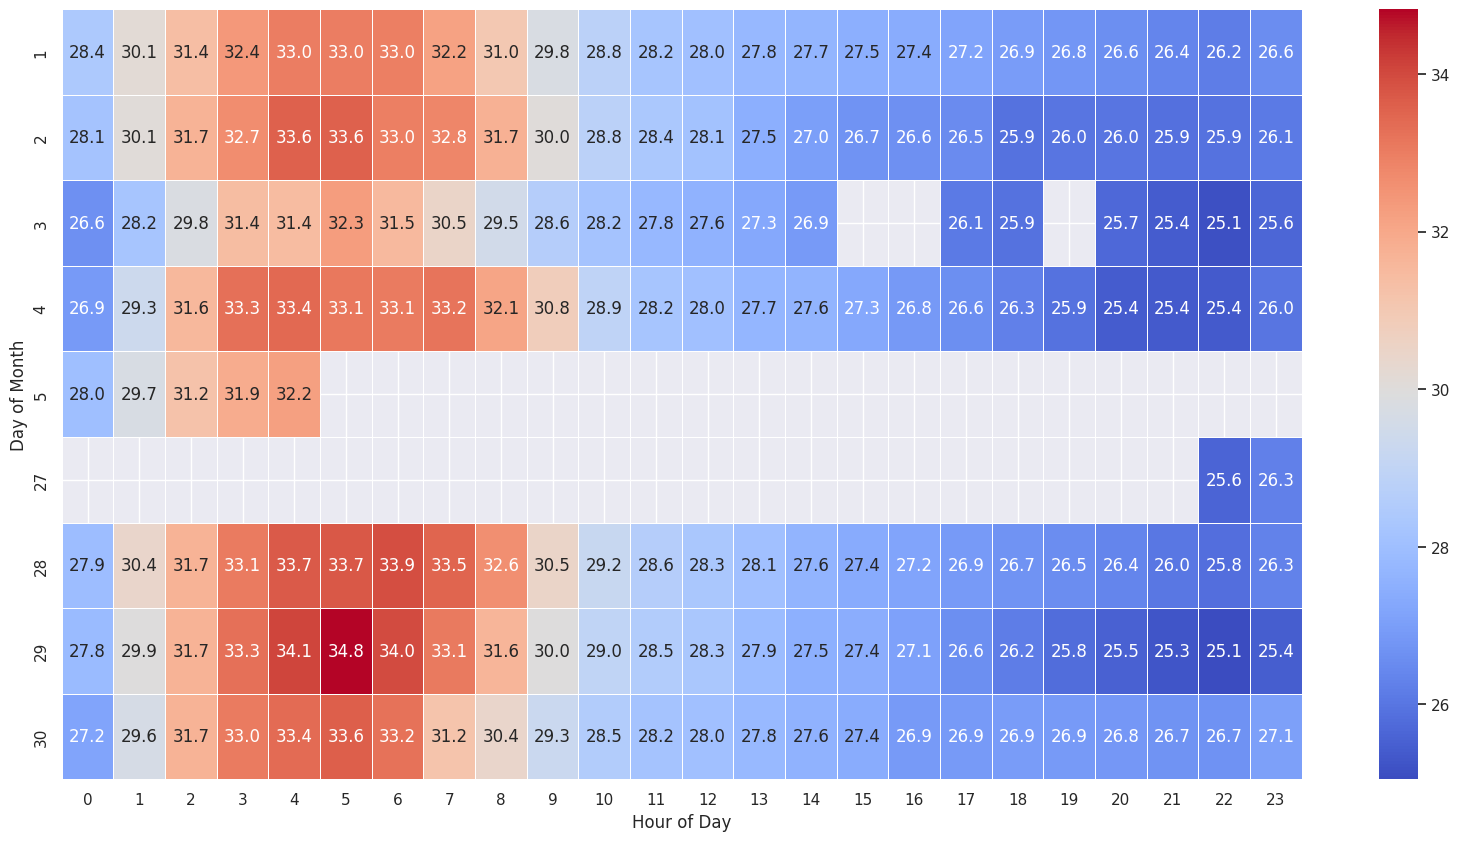

In [17]:
# Pastikan kolom 'timestamp' sudah diubah ke format datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['hour'] = datacuaca['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>